# Vanilla KNN: Classification and Regression

**Python ITB**<br>
**Makers Institute, Jalan Kyai Gede Utama No.11, Dago**<br>


**Tuesday, 20 March 2018**

# ABOUT ME

## Amajid Sinar Guntara

[Medium](https://medium.com/@amajidsinar) | [GitHub](https://github.com/amajidsinar)

# Contributors

- [Gilang Ardya](https://github.com/gilangardya)
- [Albert Setiawan](https://github.com/riajuualbert)
- [Aris Budi Wibowo](https://github.com/arisbw)

# Outline

- Theory of KNN
- KNN
- Intro to Class
- KNN w/ OOP
- Intro to Tensor
- Optimize KNN (w/ Tensor)

You can also see this repository at: https://github.com/python-itb/knn-from-scratch

# Classification vs Regression

<center><img src="./image/Classification-and-Regression-dataaspirant.png" width=80%></center>

# What is KNN?

<center><img src="./image/knn-visualization.png" width=70%></center>

A simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

This model is a non-parametric (makes no assumption about data distribution) and instance-based (memorize data as "knowledge").

Basically, we can use KNN at ease while it comes in a **huge** computational cost if we use a big dataset.

So, in conclusion: this is a lazy algorithm but impractical if we want fast responses as we have more data to train.

# More of KNN

Let's say we want to predict _unseen_ observation. First, we calculate the distance between the data points that we have (training data) and that observation (test data).

In this class, we use Euclidean distance.

$D_{(a,b)} = \sqrt{(a_1-b_1)^2+(a_2-b_2)^2+...+(a_n+b_n)^2}$

Iterate all the the train data points until you have the distance data between train data and test data.

Count $k$ nearest neighbours and decide which one has the most vote. Then we label the test data with that result.

# Example

<center><img src="./image/KNN_example_2.png" width=90%></center>

# Let's Build from Scratch!

# Classification

First, import the libraries that we will use later.

In [1]:
from sklearn import datasets
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

Load the data

In [2]:
data = datasets.load_iris()

In [3]:
X = data.data
y = data.target

Split the data to train and test data.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Create the distance function that we want to use.

In [5]:
# Input : list
def euclideanDistance(l1, l2):
    if (len(l1) == len(l2)):
        dist = 0
        for i in range(len(l1)):
            dist += (l1[i] - l2[i])**2
        return dist**0.5
    else:
        raise ValueError('Hehe, panjangnya beda gan')

Set the value of $k$.

In [6]:
k = 5

Let's start predict the test data!

In [7]:
y_test_predict = [] # target yang diprediksi

for x_unknown in X_test:
    neighbors_distance = []
    
    for x_known in X_train:
        neighbors_distance.append(euclideanDistance(x_unknown, x_known))
        
    neighbors_distance_sorted_with_target = sorted(zip(neighbors_distance, y_train))
    
    k_nearest_neighbors_target = [items[1] for items in neighbors_distance_sorted_with_target[:k]]

    # mode of knn : classification
    y_test_predict.append(max(set(k_nearest_neighbors_target), key=k_nearest_neighbors_target.count))

print (y_test_predict)

[2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0]


Evaluate our prediction.

In [8]:
n_benar = 0
for i, prediksi in enumerate(y_test_predict):
    if (prediksi == y_test[i]):
        n_benar += 1
print(n_benar/len(y_test))

0.9666666666666667


Compare with the built-in functions from scikit-learn.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

🥁🥁🥁🥁

In [10]:
knn.score(X_test,y_test)

0.96666666666666667

# Regression

Load the data.

In [11]:
data = datasets.load_boston()
X = data.data
y = data.target

Split the data to train and test data.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Predict the test data.

In [13]:
from sklearn.metrics import mean_squared_error

# Calculate Neighbors Distance
k = 5               # number ok k
y_test_predict = [] # target yang diprediksi

for x_unknown in X_test:
    neighbors_distance = []
    
    for x_known in X_train:
        neighbors_distance.append(euclideanDistance(x_unknown, x_known))
        
    neighbors_distance_sorted_with_target = sorted(zip(neighbors_distance, y_train))
    
    k_nearest_neighbors_target = [items[1] for items in neighbors_distance_sorted_with_target[:k]]

    # bedanyan hanya di sini
    # mean of knn : regression
    y_test_predict.append(round(sum(k_nearest_neighbors_target)/k, 2))

Evaluate our prediction.

In [14]:
print(mean_squared_error(y_test_predict, y_test))

37.378627451


Compare with built-in functions from scikit-learn.

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_predict = knn_reg.predict(X_test)
mean_squared_error(y_predict, y_test)

37.378627450980389

# Class

https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/

<center><img src="./image/class.jpg" width=50%></center>

# KNN with Class

In [16]:
class KNN:    
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def euclideanDistance(self, l1, l2):
        if (len(l1) != len(l2)):
            raise ValueError('Different shape')
        else:
            dist = 0
            for i in range(len(l1)):
                dist += (l1[i]-l2[i])**2
            
            return dist**0.5
            
    
    def predict(self, X):
        y_predict = []
        for x_unknown in X:
            neighbors_distance = []
            
            for x_known in self.X:
                neighbors_distance.append(self.euclideanDistance(x_unknown,x_known))
            
            neighbors_distance_sorted_with_label = sorted(zip(neighbors_distance,self.y))
            
            k_nearest_neighbors_label = [items[1] for items in neighbors_distance_sorted_with_label[:self.n_neighbors]]
                
            y_predict.append(max(set(k_nearest_neighbors_label), key=k_nearest_neighbors_label.count))
        
        return y_predict
            
    def score(self, X, y):
        y_predict = self.predict(X)
            
        true_label = 0
        for i in range(len(y)):
            if (y_predict[i] == y[i]): true_label += 1

        return(true_label/len(y))

Let's repeat what we did before but with that knn object above.

In [17]:
data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [18]:
knn = KNN()

In [19]:
knn.fit(X_train, y_train)

In [20]:
knn.score(X_test, y_test)

0.9666666666666667

# (a bit) Intro to Tensor

<center><img src="./image/tensor-1.jpg" width=100%></center>

<center><img src="./image/tensor-2.jpg" width=100%></center>

# Let's optimize our KNN model with Tensor

In [21]:
import numpy as np
import random

class Knn():
    def __init__(self, k, dist='euc'):
        avDist = ['euc', 'manhattan']
        if dist not in avDist:
            raise ValueError('Gak ada distance-nya gan')
        self.k = k
        self.dist = dist
    
    def fit(self,data_known,label_known):
        self.data_known = data_known
        self.label_known = label_known
        
    def euc(self):
        diff = self.data_known - self.data_unknown.reshape((self.data_unknown.shape[0],1,self.data_unknown.shape[1]))
        return (diff**2).sum(2)
    
    def manhattan(self):
        diff = self.data_known - self.data_unknown.reshape((self.data_unknown.shape[0],1,self.data_unknown.shape[1]))
        return np.abs(diff).sum(2)
    
    def predict(self, data_unknown):
        self.data_unknown = data_unknown
        #sort label
        if self.dist == 'euc':
            dist_index = np.argsort(self.euc())
        else:
            dist_index = np.argsort(self.manhattan())
        
        label = self.label_known[dist_index]
        #only pick until kth index
        label = label[:,:self.k]
        #return the mode
        label_predict = []
        for i in range(self.data_unknown.shape[0]):
            values,counts =  np.unique(label[i], return_counts=True)
            ind = np.argmax(counts)
            label_predict.append(values[ind])
        return label_predict
    
def split(data_known,label_known,training_percentage):
    #data_set and label is static
    data_set = data_known
    label = label_known
    #take percentage*len(data)
    index = random.sample(range(len(data_known)),int(training_percentage*len(data_known)))
    data_known = data_set[index]
    label_known =  label[index]
    data_unknown = np.delete(data_set, index, axis=0)
    label_unknown = np.delete(label, index, axis=0)
    return (data_known,label_known,data_unknown,label_unknown)

Now, we use digits dataset (MNIST). We will try to classify digits based on hand-written images.

In [22]:
digits = datasets.load_digits()

data_known = digits.data
label_known = digits.target

data_known,label_known,data_unknown,label_unknown = split(data_known,label_known,0.8)

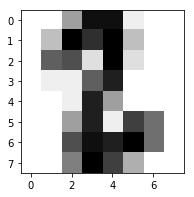

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(3, 3))
plt.imshow(data_known[1].reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Calculate the speed time with our optimized-knn model.

In [24]:
import timeit

start = timeit.default_timer()

k=5
knn = Knn(k)
knn.fit(data_known,label_known)
label_predict = knn.predict(data_unknown)
performance = np.mean(label_predict == label_unknown)
print(performance)

stop = timeit.default_timer()
print(stop - start)

0.991666666667
0.5782670599393878


Compare with our previous class knn model.

In [25]:
start = timeit.default_timer()

knn = KNN(n_neighbors=k)
knn.fit(data_known, label_known)
performance = knn.score(data_unknown, label_unknown)

print(performance)

stop = timeit.default_timer()

print(stop - start)

0.9916666666666667
34.59477051956458


Last, let's compare it with built-in functions from scikit-learn.

In [26]:
start = timeit.default_timer()

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(data_known, label_known)
performance = knn.score(data_unknown, label_unknown)

print(performance)

stop = timeit.default_timer()

print(stop - start)

0.991666666667
0.1015513166714399


# Find the best k

<center><img src="./image/knn-size.png" width=70%></center>

In [27]:
val_accuracy = []
for i in np.arange(1,50):
    knn = Knn(i)
    knn.fit(data_known,label_known)
    label_predict = knn.predict(data_unknown)
    performance = np.mean(label_predict == label_unknown)
    val_accuracy.append(performance)

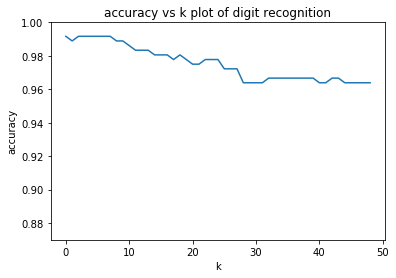

In [28]:
plt.title('accuracy vs k plot of digit recognition')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.ylim([0.87,1])
plt.plot(val_accuracy)

# References

1. http://dataaspirant.com/2014/09/27/classification-and-prediction/
1. http://www.saedsayad.com/k_nearest_neighbors.htm
1. https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/#what-is-knn
1. https://stats.stackexchange.com/questions/237100/why-knn-and-svm-with-a-gaussian-are-non-parametric-models
1. https://github.com/amajidsinar/vanilla-ml/
1. https://chrisalbon.com/machine_learning/nearest_neighbors/identifying_best_value_of_k/

# Thank you! 🙏🙇‍